In [10]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

## Innput

In [11]:
# Loan characteristics
original_balance = 500000
coupon = 0.08
term = 120


## Serielån

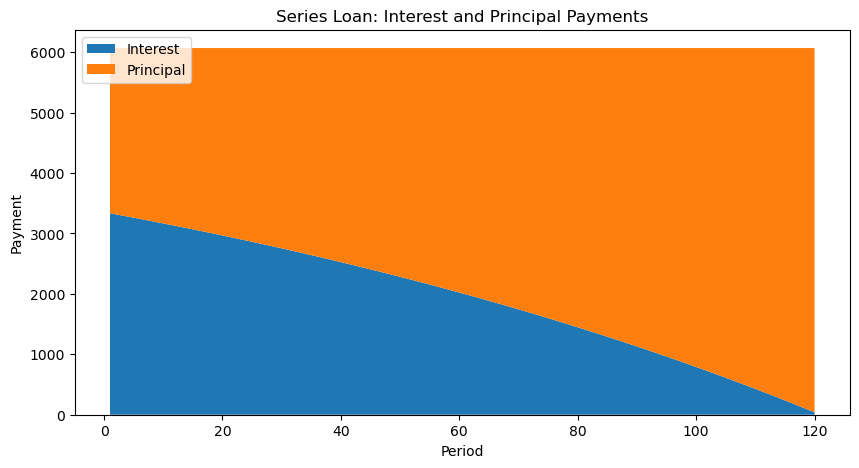

Series Loan Cash Flow Table:
    Beginning Balance  Payment  Interest  Principal  Ending Balance
1          500,000.00 6,066.38  3,333.33   2,733.05      497,266.95
2          497,266.95 6,066.38  3,315.11   2,751.27      494,515.69
3          494,515.69 6,066.38  3,296.77   2,769.61      491,746.08
4          491,746.08 6,066.38  3,278.31   2,788.07      488,958.01
5          488,958.01 6,066.38  3,259.72   2,806.66      486,151.35
6          486,151.35 6,066.38  3,241.01   2,825.37      483,325.98
7          483,325.98 6,066.38  3,222.17   2,844.21      480,481.77
8          480,481.77 6,066.38  3,203.21   2,863.17      477,618.60
9          477,618.60 6,066.38  3,184.12   2,882.26      474,736.35
10         474,736.35 6,066.38  3,164.91   2,901.47      471,834.87
11         471,834.87 6,066.38  3,145.57   2,920.81      468,914.06
12         468,914.06 6,066.38  3,126.09   2,940.29      465,973.77
13         465,973.77 6,066.38  3,106.49   2,959.89      463,013.89
14         463,013.

In [12]:
periods = range(1, term + 1)

interest_payment_series = npf.ipmt(rate=coupon / 12, per=periods, nper=term, pv=-original_balance)
principal_payment_series = npf.ppmt(rate=coupon / 12, per=periods, nper=term, pv=-original_balance)

# Plot stacked payments for Series Loan
plt.figure(figsize=(10, 5))
plt.stackplot(periods, interest_payment_series, principal_payment_series, labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.title("Series Loan: Interest and Principal Payments")
plt.show()

# Cash flow table for Series Loan
cf_data_series = {'Interest': interest_payment_series, 'Principal': principal_payment_series}
cf_table_series = pd.DataFrame(data=cf_data_series, index=periods)
cf_table_series['Payment'] = cf_table_series['Interest'] + cf_table_series['Principal']
cf_table_series['Ending Balance'] = original_balance - cf_table_series['Principal'].cumsum()
cf_table_series['Beginning Balance'] = [original_balance] + list(cf_table_series['Ending Balance'])[:-1]
cf_table_series = cf_table_series[['Beginning Balance', 'Payment', 'Interest', 'Principal', 'Ending Balance']]
cf_table_series = cf_table_series.head(25)

# Display the cash flow table for Series Loan
print("Series Loan Cash Flow Table:")
print(cf_table_series)
print("\n")

# Payments for Annuity Loan
monthly_payment_annuity = npf.pmt(rate=coupon / 12, nper=term, pv=-original_balance)
total_payments_annuity = abs(monthly_payment_annuity) * term

In [13]:
# Payments for Series Loan
periods = range(1, term + 1)
interest_payment = npf.ipmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)

# Dataframe to store the payment details
payments = pd.DataFrame({'Period': periods,
                         'Interest_Payment': interest_payment,
                         'Principal_Payment': principal_payment})

# Display the first few rows of the payments
print(payments.head())

   Period  Interest_Payment  Principal_Payment
0       1          3,333.33           2,733.05
1       2          3,315.11           2,751.27
2       3          3,296.77           2,769.61
3       4          3,278.31           2,788.07
4       5          3,259.72           2,806.66


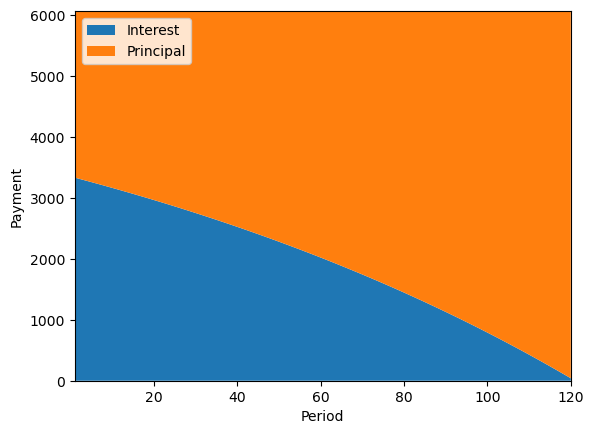

In [14]:
plt.stackplot(periods, interest_payment, principal_payment, 
              labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.margins(0, 0)

In [15]:
pd.options.display.float_format = '{:,.2f}'.format

# cash flow table_
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table.head(25)

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"500,000.00","6,066.38","3,333.33","2,733.05","497,266.95"
2,"497,266.95","6,066.38","3,315.11","2,751.27","494,515.69"
3,"494,515.69","6,066.38","3,296.77","2,769.61","491,746.08"
4,"491,746.08","6,066.38","3,278.31","2,788.07","488,958.01"
5,"488,958.01","6,066.38","3,259.72","2,806.66","486,151.35"
6,"486,151.35","6,066.38","3,241.01","2,825.37","483,325.98"
7,"483,325.98","6,066.38","3,222.17","2,844.21","480,481.77"
8,"480,481.77","6,066.38","3,203.21","2,863.17","477,618.60"
9,"477,618.60","6,066.38","3,184.12","2,882.26","474,736.35"
10,"474,736.35","6,066.38","3,164.91","2,901.47","471,834.87"


## Annuitetslånet

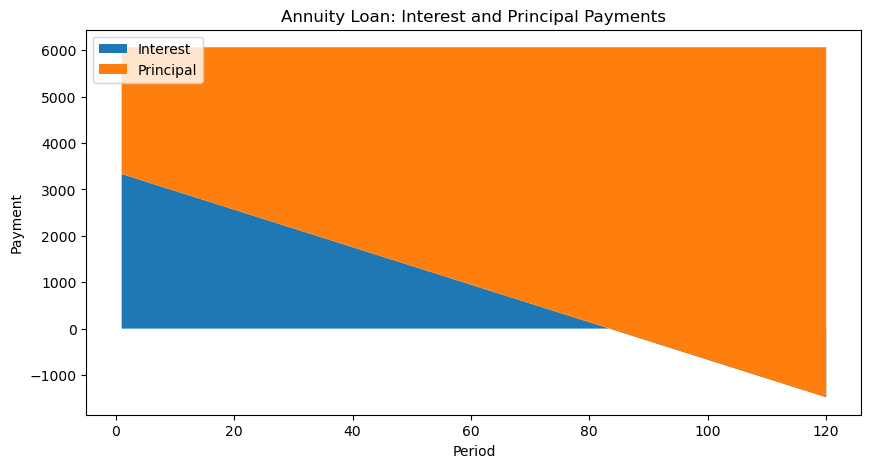

Annuity Loan Cash Flow Table:
    Beginning Balance  Payment  Interest  Principal  Ending Balance
1          500,000.00 6,066.38  3,333.33   2,733.05      497,266.95
2          497,266.95 6,066.38  3,292.89   2,773.49      494,493.46
3          494,493.46 6,066.38  3,252.45   2,813.93      491,679.53
4          491,679.53 6,066.38  3,212.01   2,854.37      488,825.16
5          488,825.16 6,066.38  3,171.56   2,894.82      485,930.34
6          485,930.34 6,066.38  3,131.12   2,935.26      482,995.08
7          482,995.08 6,066.38  3,090.68   2,975.70      480,019.38
8          480,019.38 6,066.38  3,050.24   3,016.14      477,003.24
9          477,003.24 6,066.38  3,009.79   3,056.59      473,946.65
10         473,946.65 6,066.38  2,969.35   3,097.03      470,849.62
11         470,849.62 6,066.38  2,928.91   3,137.47      467,712.15
12         467,712.15 6,066.38  2,888.47   3,177.91      464,534.24
13         464,534.24 6,066.38  2,848.02   3,218.36      461,315.88
14         461,315

In [16]:
monthly_payment_annuity = npf.pmt(rate=coupon / 12, nper=term, pv=-original_balance)
total_payments_annuity = abs(monthly_payment_annuity) * term

# Annuity Loan
interest_payment_annuity = []
principal_payment_annuity = []
for period in periods:
    interest_payment_annuity.append((original_balance - (period - 1) * monthly_payment_annuity) * (coupon / 12))
    principal_payment_annuity.append(monthly_payment_annuity - interest_payment_annuity[-1])

# Plot stacked payments for Annuity Loan
plt.figure(figsize=(10, 5))
plt.stackplot(periods, interest_payment_annuity, principal_payment_annuity, labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.title("Annuity Loan: Interest and Principal Payments")
plt.show()

# Cash flow table for Annuity Loan
cf_data_annuity = {'Interest': interest_payment_annuity, 'Principal': principal_payment_annuity}
cf_table_annuity = pd.DataFrame(data=cf_data_annuity, index=periods)
cf_table_annuity['Payment'] = cf_table_annuity['Interest'] + cf_table_annuity['Principal']
cf_table_annuity['Ending Balance'] = original_balance - cf_table_annuity['Principal'].cumsum()
cf_table_annuity['Beginning Balance'] = [original_balance] + list(cf_table_annuity['Ending Balance'])[:-1]
cf_table_annuity = cf_table_annuity[['Beginning Balance', 'Payment', 'Interest', 'Principal', 'Ending Balance']]
cf_table_annuity = cf_table_annuity.head(25)

# Display the cash flow table for Annuity Loan
print("Annuity Loan Cash Flow Table:")
print(cf_table_annuity)

In [17]:
# Payments for Annuity Loan
monthly_payment = npf.pmt(rate=coupon / 12, nper=term, pv=-original_balance)
total_payments = abs(monthly_payment) * term

# Dataframe to store the payment schedule for the annuity loan
payment_schedule = pd.DataFrame({'Period': periods,
                                'Monthly_Payment': [monthly_payment] * term,
                                'Total_Payments': [total_payments] * term})

# Display the first few rows of the payment schedule
print(payment_schedule.head())

   Period  Monthly_Payment  Total_Payments
0       1         6,066.38      727,965.57
1       2         6,066.38      727,965.57
2       3         6,066.38      727,965.57
3       4         6,066.38      727,965.57
4       5         6,066.38      727,965.57


In [18]:
# Payments for Series Loan
periods = range(1, term + 1)
interest_payment = npf.ipmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)

# Dataframe to store the payment details
payments = pd.DataFrame({'Period': periods,
                         'Interest_Payment': interest_payment,
                         'Principal_Payment': principal_payment})

# Display the first few rows of the payments
print(payments.head())

   Period  Interest_Payment  Principal_Payment
0       1          3,333.33           2,733.05
1       2          3,315.11           2,751.27
2       3          3,296.77           2,769.61
3       4          3,278.31           2,788.07
4       5          3,259.72           2,806.66


In [19]:
pd.options.display.float_format = '{:,.2f}'.format

# cash flow table_
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table.head(25)

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"500,000.00","6,066.38","3,333.33","2,733.05","497,266.95"
2,"497,266.95","6,066.38","3,315.11","2,751.27","494,515.69"
3,"494,515.69","6,066.38","3,296.77","2,769.61","491,746.08"
4,"491,746.08","6,066.38","3,278.31","2,788.07","488,958.01"
5,"488,958.01","6,066.38","3,259.72","2,806.66","486,151.35"
6,"486,151.35","6,066.38","3,241.01","2,825.37","483,325.98"
7,"483,325.98","6,066.38","3,222.17","2,844.21","480,481.77"
8,"480,481.77","6,066.38","3,203.21","2,863.17","477,618.60"
9,"477,618.60","6,066.38","3,184.12","2,882.26","474,736.35"
10,"474,736.35","6,066.38","3,164.91","2,901.47","471,834.87"
